In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
market_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'market_demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
inventory_level = ctrl.Antecedent(np.arange(0, 11, 1), 'inventory_level')
final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')

In [ ]:
market_demand['low'] = fuzz.trimf(market_demand.universe, [0, 0, 3])
market_demand['medium'] = fuzz.trimf(market_demand.universe, [2, 5, 8])
market_demand['high'] = fuzz.trimf(market_demand.universe, [7, 10, 10])

competitor_price['low'] = fuzz.trimf(competitor_price.universe, [0, 0, 3])
competitor_price['medium'] = fuzz.trimf(competitor_price.universe, [2, 5, 8])
competitor_price['high'] = fuzz.trimf(competitor_price.universe, [7, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 3])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [2, 5, 8])
production_cost['high'] = fuzz.trimf(production_cost.universe, [7, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 3])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [2, 5, 8])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [7, 10, 10])

inventory_level['low'] = fuzz.trimf(inventory_level.universe, [0, 0, 3])
inventory_level['medium'] = fuzz.trimf(inventory_level.universe, [2, 5, 8])
inventory_level['high'] = fuzz.trimf(inventory_level.universe, [7, 10, 10])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 2])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 3, 5])
final_price['medium'] = fuzz.trimf(final_price.universe, [4, 5, 6])
final_price['high'] = fuzz.trimf(final_price.universe, [5, 7, 9])
final_price['very_high'] = fuzz.trimf(final_price.universe, [8, 10, 10])


In [ ]:
rule1 = ctrl.Rule(market_demand['high'] & competitor_price['high'] & inventory_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(market_demand['high'] & seasonality['peak'] & inventory_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(market_demand['medium'] & production_cost['high'] & inventory_level['low'], final_price['very_high'])
rule4 = ctrl.Rule(market_demand['high'] & competitor_price['medium'] & inventory_level['medium'], final_price['high'])
rule5 = ctrl.Rule(market_demand['medium'] & competitor_price['high'] & inventory_level['low'], final_price['high'])
rule6 = ctrl.Rule(market_demand['medium'] & seasonality['peak'] & inventory_level['medium'], final_price['high'])
rule7 = ctrl.Rule(market_demand['medium'] & competitor_price['medium'] & inventory_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(market_demand['medium'] & competitor_price['high'] & inventory_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(market_demand['low'] & competitor_price['high'] & inventory_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['medium'], final_price['medium'])
rule11 = ctrl.Rule(market_demand['low'] & competitor_price['low'] & inventory_level['high'], final_price['low'])
rule12 = ctrl.Rule(market_demand['medium'] & production_cost['medium'] & inventory_level['high'], final_price['low'])
rule13 = ctrl.Rule(market_demand['low'] & seasonality['off_peak'] & inventory_level['high'], final_price['low'])
rule14 = ctrl.Rule(market_demand['low'] & competitor_price['low'] & inventory_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(market_demand['low'] & seasonality['off_peak'] & inventory_level['high'], final_price['very_low'])
rule16 = ctrl.Rule(market_demand['medium'] & competitor_price['low'] & inventory_level['high'], final_price['very_low'])



In [ ]:
pricing_control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
    rule10, rule11, rule12, rule13, rule14, rule15, rule16
])
fuzzy_pricing_simulation = ctrl.ControlSystemSimulation(pricing_control_system)


Giá cuối cùng được đề xuất: 6.4 (Cao)


<Figure size 1000x300 with 0 Axes>

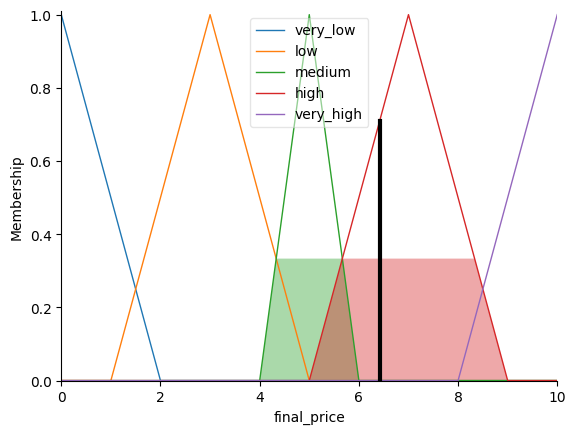

In [ ]:
fuzzy_pricing_simulation.input['market_demand'] = 7
fuzzy_pricing_simulation.input['competitor_price'] = 6
fuzzy_pricing_simulation.input['production_cost'] = 5
fuzzy_pricing_simulation.input['seasonality'] = 8
fuzzy_pricing_simulation.input['inventory_level'] = 3

fuzzy_pricing_simulation.compute()


price_value = fuzzy_pricing_simulation.output['final_price']
if price_value <= 2:
    price_label = "Rất thấp"
elif price_value <= 4:
    price_label = "Thấp"
elif price_value <= 6:
    price_label = "Trung bình"
elif price_value <= 8:
    price_label = "Cao"
else:
    price_label = "Rất cao"


print(f"Giá cuối cùng được đề xuất: {price_value:.1f} ({price_label})")


plt.figure(figsize=(10, 3))
final_price.view(sim=fuzzy_pricing_simulation)
plt.show()
